# 06_proximeta_assoc_gtdbtk

This document explores the phylogenetic make-up of identified MAGs with associated viruses. 

## Load packages and data

In [12]:
# load packages
import pandas as pd
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

# load functions
def count_classified(df, level):
    level_prefix = level[0] + '__'
    subdf = df[(df[level] != 'Unclassified') & (~df[level].isna()) & (df[level] != '') & (df[level] != level_prefix)]
    return len(subdf)

# file paths
path = '/Users/melissaherring/Google Drive/My Drive/MH_project/'
#path = '/Users/juliabrown/Google Drive/My Drive/projects/OMZvir_round2/MH_project/'

# from 05_create_proximeta_assoc_gtdb_table:
assoc_gtdb = pd.read_csv(op.join(path,'tables/proximeta_assoc_gtdb_table.csv'))

## Create lists of the 10 most abundant taxonomic groups for each level of classification

In [13]:
# create a list of taxonomy columns
tax_cols = ['domain', 'phyla','class','order','family','genus','species']

# create an empty dictionary
assoc_top_dict = {}

# for loop to create a list of the 10 most abundant taxonomic groups for each level of classification
for column in tax_cols:
    most_common = assoc_gtdb[column].value_counts().head(10).index.tolist()
    assoc_top_dict[column] = most_common

# create a list using the corresponding column of the assoc_top_dict
phyla_list = assoc_top_dict['phyla']
class_list = assoc_top_dict['class']
order_list = assoc_top_dict['order']

## Create color maps

In [14]:
# create a list of colors
phyla_color_list = ['lightgreen', 'mediumseagreen', 'c', 'cadetblue', 'mediumpurple', 'plum', 'lightsalmon', 'orange', 'goldenrod', 'tan']
# create a dictionary/color map
phyla_color_map = dict(zip(phyla_list, phyla_color_list))

class_color_list = ['hotpink','r', 'crimson', 'darkred', 'chocolate', 'brown', 'rosybrown', 'mediumvioletred', 'pink', 'violet', 'lightgrey', 'dimgrey']
class_color_map = dict(zip(class_list, class_color_list))

order_color_list = ['lightskyblue', 'steelblue', 'dodgerblue', 'forestgreen', 'limegreen', 'darkolivegreen', 'mediumslateblue', 'saddlebrown', 'orchid', 'lightslategray', 'yellowgreen', 'turquoise', 'teal']
order_color_map = dict(zip(order_list, order_color_list))

## How many associations were classified in total?

In [16]:
tot = len(assoc_gtdb['domain'])
tot

336

## How many MAGs were classified to at least that classification level?

In [17]:
level_counts = [] # set up empty level counts string

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    lcount = count_classified(assoc_gtdb, level)
    
    print('There are', lcount, 'MAGs annotated to', level,".") 
    
    level_counts.append(lcount)

There are 290 MAGs annotated to domain .
There are 196 MAGs annotated to phyla .
There are 196 MAGs annotated to class .
There are 196 MAGs annotated to order .
There are 196 MAGs annotated to family .
There are 166 MAGs annotated to genus .
There are 129 MAGs annotated to species .


In [18]:
# create a data frame of the number of MAGs associated with each level
dict_assoc = {'tax_level': levels, 'num_associations_classified': level_counts} # create a dictionary with the number classified for each level

GTDB_assoc = pd.DataFrame(data = dict_assoc)

GTDB_assoc['percent_classified'] = GTDB_assoc['num_associations_classified']/tot*100 # add a column to the dataframe that is the percent of MAGs

GTDB_assoc

,tax_level,num_associations_classified,percent_classified
0,domain,290,86.309524
1,phyla,196,58.333333
2,class,196,58.333333
3,order,196,58.333333
4,family,196,58.333333
5,genus,166,49.404762
6,species,129,38.392857


Text(0.5, 1.0, 'Percent of MAGs Classified with GTDB')

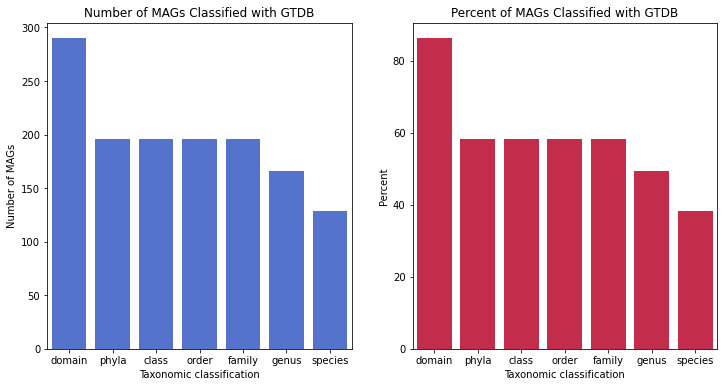

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6),sharex=True)

sns.barplot(x = 'tax_level', y= 'num_associations_classified', data = GTDB_assoc, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of MAGs')
axes[0].set_title('Number of MAGs Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = GTDB_assoc, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_title('Percent of MAGs Classified with GTDB')

## What are the most common classifications?

In [20]:
# top 5 groups in each level
for taxa in ['domain', 'phyla','class','order','family','genus','species']:
    print(df.groupby(taxa)['host_name'].count().sort_values(ascending=False)[:5])
    print("\n")

domain
Bacteria                 183
Unclassified Bacteria     93
Unclassified              46
Archaea                   13
Unclassified Archaea       1
Name: host_name, dtype: int64


phyla
Planctomycetota    35
Pseudomonadota     32
Cyanobacteriota    30
Acidobacteriota    18
Patescibacteria    13
Name: host_name, dtype: int64


class
Planctomycetia         31
Cyanobacteriia         30
Gammaproteobacteria    23
Vicinamibacteria       11
Acidimicrobiia         11
Name: host_name, dtype: int64


order
Pirellulales          31
PCC-6307              30
Arenicellales         18
Vicinamibacterales    11
Verrucomicrobiales    10
Name: host_name, dtype: int64


family
Cyanobiaceae       30
Pirellulaceae      27
UBA5680            15
Akkermansiaceae    10
MedAcidi-G1         9
Name: host_name, dtype: int64


genus
ARS98                26
Prochlorococcus_C    22
UBA5680              15
Roseibacillus_B      10
GCA-2729515           7
Name: host_name, dtype: int64


species
ARS98 sp002685655     

Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

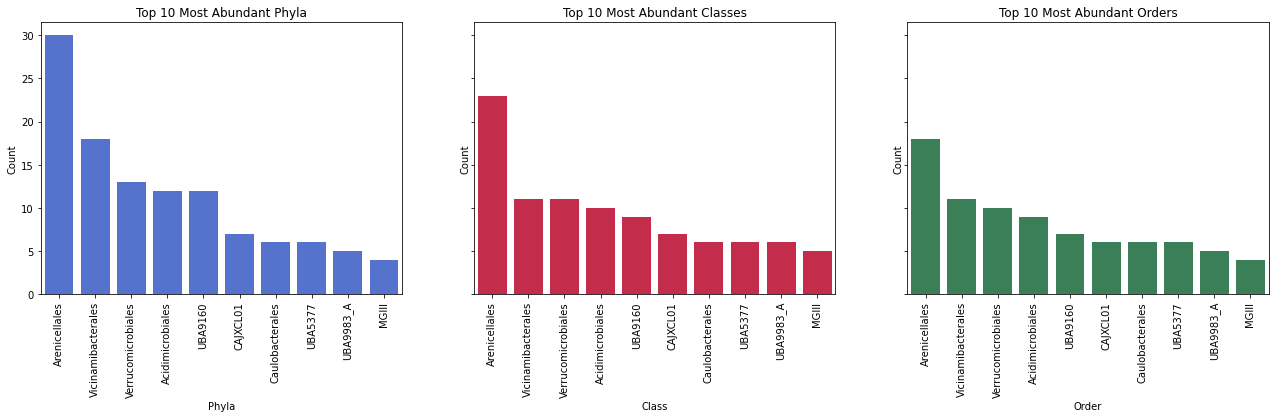

In [8]:
phyla_assoc = df.groupby('phyla', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_phyla_assoc = phyla_assoc [2:12] # 1 is NA

class_assoc = df.groupby('class', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_class_assoc = class_assoc [2:12] # 1 is NA

order_assoc = df.groupby('order', as_index=False)['host_name'].count().sort_values(by = 'host_name',ascending=False)
top_order_assoc = order_assoc [2:12] # 1 is NA

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5),sharex=True, sharey=True)

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'host_name', data = top_phyla_assoc, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'host_name', data = top_class_assoc, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'host_name', data = top_order_assoc, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')

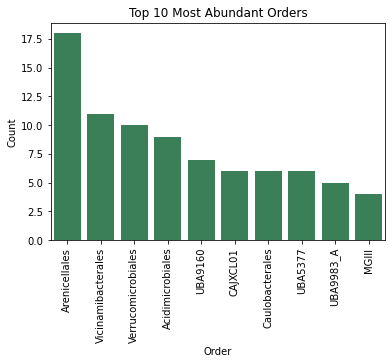

In [9]:
sns.barplot(x = 'order', y= 'host_name', data = top_order_assoc, color = 'seagreen')
plt.xlabel('Order')
plt.ylabel('Count')
plt.title('Top 10 Most Abundant Orders')
plt.tick_params(axis='x', rotation=90)

## Plot tax level

In [22]:
top_10_class = list(df.groupby('class', as_index = False)['host_name'].count().sort_values(by = 'host_name', ascending = False)[:10]['class'])

plot_class = []

for item in assoc_gtdb['class']:
    if item in top_10_class:
        plot_class.append(item)
    else:
        plot_class.append('Other')

assoc_gtdb['plot_class'] = plot_class

Text(0.5, 1.0, 'Count')

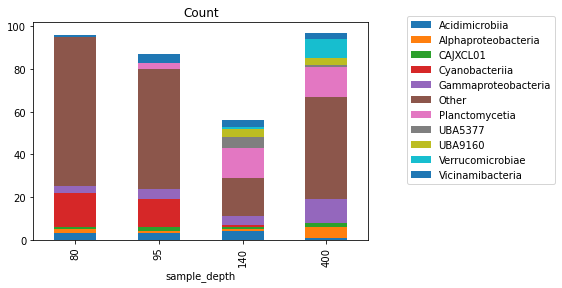

In [23]:
class_counts_assoc = assoc_gtdb.groupby(['sample_depth', 'plot_class'], as_index = False)['host_name'].count().pivot(columns = 'plot_class', index = 'sample_depth', values = 'host_name')

class_counts_assoc.plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Count')

Text(0.5, 1.0, 'Percent')

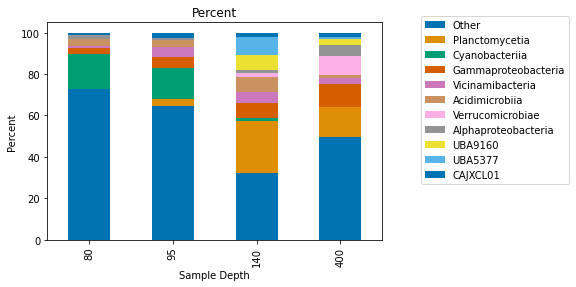

In [25]:
column_order = ['Other'] + top_10_class

class_pcts = class_counts_assoc.div(class_counts_assoc.sum(axis=1), axis=0)
class_pcts = round(class_pcts * 100, 1)

sns.set_palette("colorblind")

class_pcts[column_order].plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('Percent')
plt.xlabel('Sample Depth')
plt.title('Percent')